# TP 20 - Effet des frottements sur la chute d'un point matériel

<div class="alert alert-warning" role="alert">
    Le but du TP est d'étudier numériquement la chute d'un objet dans le champ de pesanteur terrestre avec ou sans 
    frottements. La méthode odeint de la librairie scientifique sera utilisée pour résoudre numériquement une équation 
    différentielle linéaire ou non.<br>
    Régulièrement pendant le TP et à la fin, enregistrez votre production dans Espaces partagés > Devoirs > Physique sous la forme TP20_"votre nom".ipynb
</div>

Le mouvement de chute se faisant dans un plan, l'étude se fera dans le plan (xOz).

Pour utiliser `odeint`, nous devons transformer les deux équations différentielles de second ordre sur chaque axe (x,z) en une équation différentielle du premier ordre du type $Y' = F(Y,t)$ avec F une fonction de $\mathbb{R}^5 \rightarrow \mathbb{R}^4$ et Y un vecteur du type $Y=(v_z, v_x , z, x)$.

Pour une chute sans frottements, avec frottements proportionnels à la vitesse ou proportionnels au carré de la vitesse, vous devrez créer des fonctions $F$ différentes. Ce sera l'objet de la partie 2.

Pour tester votre fonction, vous pouvez lui appliquer la méthode d'Euler plus compréhensible que la méthode `odeint`. Il faudra comprendre et tester cette méthode avant de passer à `odeint` : ce sera l'objet de la partie 1. 

La partie 3 concerne une modélisation d'une chute avec frottements de type stokes comme le cas de la chute d'une bille dans du glycerol fait en TP.

La partie 4 concerne la modélisation d'une chute d'une balle de tenis comme fait en TP.

In [1]:
# Nous aurons besoin des bibliotèques suivantes 
import numpy as np # pour les tableaux
import matplotlib.pyplot as plt # pour tracer les solutions
from scipy.integrate import odeint # pour la résolution des ED

# Pour le tracer des résultats (sauf sur basthon), décommentez une de ces lignes :
#%matplotlib notebook # figures interactives
#%matplotlib inline # figures fixes

## 1 - Chute sans frottements avec la méthode d'Euler et le formalisme d'odeint (1h)

La méthode d'Euler adaptée à la fonction F et au vecteur Y revient à écrire la procédure suivante : 

\begin{align*}
Y(t=0) &= Y_0 \quad &\text{Conditions initiales}\\
Y(t+\Delta t) &= Y(t) + F(Y,t)\Delta t \quad &\Delta t\text{ le pas de temps choisi}\\
\end{align*}



In [2]:
#Méthode d'Euler
def Euler(F,Y0,t):
    '''
    Prend en argument une fonction F, 
    un tableau de type numpy.array() représentant les conditions initiales Y0 = [vz0, vx0, z0, x0],
    et un tableau de type numpy.array() t de temps du type [0, dt, 2dt, 3dt, ..., Ndt].
    La fonction vérifie Y' = F(Y,t).
    La méthode d'Euler renvoie un tableau A en 2D de type numpy.array() dont les lignes s'écrivent : 
      Y(t = 0)  , 
      Y(t = dt) , 
      Y(t = 2dt), 
      ...       ,
      Y(t = Ndt)
    '''
    A = np.array([Y0])
    for T in t[1:]:
        Yp = np.array([A[-1, :]])# Y à t (présent)
        dY = np.array([F(A[-1, :], t)])# dY à t
        Yf = Yp + dY * t[1]# Y à t+dt (futur)
        A = np.concatenate((A, Yf), axis = 0)# ajoute la ligne Ytf à la fin du tableau
    return A

<div class="alert alert-block alert-success">
    <b>Questions :</b> <br>
    1 - Que signifie l'expression "[-1, :]" <br>
    2 - Que signifie t[1:] ? Que signifie t[1] ? <br>
    3 - Comment obtenir la position z de l'objet au 5ième temps du tableau t à partir du tableau de sortie A ? 
</div>

Réponses : 

1 - 

2 - 

3 -


Voici une fonction que peut prendre en argument la fonction `Euler` calculant la position d'un objet en chute libre ainsi que les conditions initiales et le temps de chute.

In [3]:
# constantes physiques
g = 9.81 # accélération de la pesanteur

# Fonction "F" de type chute sans frottements
def chutelibre(Y,t):
    global g # permet d'introduire une variable définie hors de la fonction
    vz, vx, z, x = Y[0], Y[1], Y[2], Y[3]
    dvz = -g
    dvx = 0
    dz = vz
    dx = vx
    return [dvz, dvx, dz, dx]


Tmax = 1 # Temps de chute en secondes
Nech = 100 # Échantillonage du temps (pas de temps dt = Tmax/Nech)
t = np.linspace(0, Tmax, Nech+1) # tableau de temps de 0 à Tmax avec un pas de temps Tmax/Nech
Y0 = np.array([0, 0, 1, 0]) # condition initiales


<div class="alert alert-block alert-success">
    <b>Questions :</b> <br>
    1 - Comment est orienté l'axe z et x par rapport à l'accélération de la pesanteur ?  <br>
    2 - D'après l'expression de Y0, que vaut la vitesse et la position initiale de l'objet suivant les axes x et z ? 
</div>

Réponses : 

1 - 

2 - 


Voici un exemple d'utilisation de la méthode d'Euler avec la fonction "F" de type chute libre et un tracé de l'altitude en fonction du temps. On retrouve visuellement le résultat attendu du type "$z = -\frac{1}{2}gt^2$"  

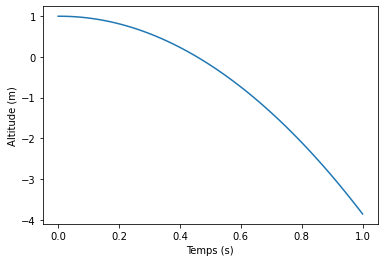

In [4]:
Tableau_a = Euler(chutelibre, Y0, t)

plt.figure()
plt.plot(t, Tableau_a[:,2])
plt.xlabel('Temps (s)')
plt.ylabel('Altitude (m)')
plt.show()

## 2 - Chuttes avec frottements et utilisation de `odeint` 

### 2.1 - Comparaison entre `odeint` et Euler
Utilisons la méthode `odeint` de la bibliotèque scipy sur l'exemple de chute sans frottements de l'exemple précédent et comparons les deux méthodes visuellement.

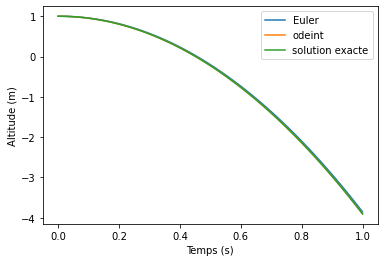

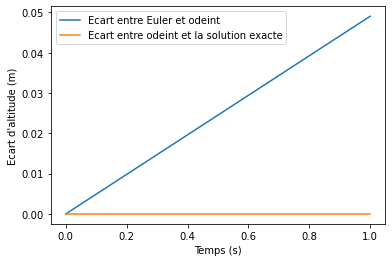

In [5]:
Tableau_b = odeint(chutelibre, Y0, t)

plt.figure()
plt.plot(t, Tableau_a[:,2], label = 'Euler')
plt.plot(t, Tableau_b[:,2], label = 'odeint')
plt.plot(t, Y0[2]-0.5*g*t**2, label = 'solution exacte')
plt.xlabel('Temps (s)')
plt.ylabel('Altitude (m)')
plt.legend()

plt.figure()
plt.plot(t, Tableau_a[:,2]-Tableau_b[:,2], label = 'Ecart entre Euler et odeint')
plt.plot(t, Y0[2]-0.5*g*t**2-Tableau_b[:,2], label = 'Ecart entre odeint et la solution exacte')
plt.xlabel('Temps (s)')
plt.ylabel("Ecart d'altitude (m)")
plt.legend()
plt.show()

Un écart de 5 centimètres au bout d'une seconde est visible entre les trajectoires calculées avec la méthode d'Euler et odeint alors qu'un écart de $10^{-11}$ mètres est observé entre la solution exacte et odeint.

<div class="alert alert-block alert-success">
    <b>Question :</b> <br>
    Quels paramètres peut-on modifier pour réduire l'écart entre la solution exacte et la méthode d'Euler ? Quel est le problème lié à cette modification ?
</div>

Réponse : 

La comparaison entre odeint et Euler nécessite de connaître la solution exacte pour savoir si une méthode donne des résultats éronnés et estimer les erreurs associées. Or c'est justement lorsque la solution exacte n'est pas connue ou pas évidente (équations différentielles non linéaires par exemple) que les méthodes numériques prennent tout leur sens. Comment les utiliser et quantifier nos erreurs sans connaître la solution exacte ? 

Une première approche consiste à calculer une quantité invariante physiquement comme l'énergie mécanique massique du système. Dans l'exemple de la chute sans frottements étudié précédement, elle s'écrit $e_m = \frac{1}{2}\dot{z}^2 + gz$ 

<div class="alert alert-block alert-success">
    <b>Code :</b> <br>
    Tracer l'énergie mécanique massique du système en chute libre en fonction du temps obtenus à partir des méthodes d'Euler et odeint en utilisant les tableaux "Tableau_a" et "Tableau_b" déjà construits. 
</div>

### 2.2 Créer les fonctions chute libre avec frottements

Dans cette partie, vous devrez créer deux fonctions notées `chute_v` et `chute_v2` prenant en argument un tableau ligne $Y=(v_z, v_x , z, x)$ à un instant t et retournant la dérivée de ce tableau à l'instant t. 

Les paramètres `a` et `b` introduits représenteront respectivement le paramètre $\alpha/m$ pour la force en $-\alpha \vec{v}$ et $\beta/m$ pour la force en $-\beta v\vec{v}$, $m$ représentant la masse de l'objet.

<div class="alert alert-block alert-success">
    <b>Code :</b> <br>
    Complétez les fonctions ci-dessous. Demandez au professeur de vérifier.
</div>

<div class="alert alert-block alert-success">
    <b>Code :</b> <br>
    Appliquer la méthode odeint sur ces fonctions en utilisant les mêmes conditions initiales Y0 et le tableau des temps t.
</div>

Les tableaux récupérés seront notés `Tableau_c` pour `chute_v` et `Tableau_d` pour `chute_v2`.

<div class="alert alert-block alert-success">
    <b>Code :</b> <br>
    En utilisant a = 1 : <br>
    1 - Tracer l'altitude en fonction du temps d'un objet soumis à des frottements proportionnels à la vitesse.<br>
    2 - Tracer la vitesse verticale en fonction du temps d'un objet soumis à des frottements proportionnels à la vitesse.<br>
    3 - Superposer la solution exacte de la vitesse verticale de ce même objet.<br>
    4 - Tracer l'énergie mécanique massique du système en fonction du temps. 
</div>

<div class="alert alert-block alert-success">
    <b>Question :</b> <br>
    La méthode odeint est-elle mise en défaut ?
</div>

Réponse : 

<div class="alert alert-block alert-success">
    <b>Code :</b> <br>
    En utilisant b = 0.02 : <br>
    1 - Tracez l'altitude de l'objet pour une force de frottement proportionnel au carré de la vitesse.<br>
    2 - Superposer la courbe de l'altitude en fonction du temps pour une chute sans frottements.<br>
    3 - Tracer la différence d'altitude en fonction du temps pour ces deux situations.
</div>

## 3 - Chute d'une bille dans du glycérol (20 min)

<div class="alert alert-block alert-success">
    <b>Code et questions :</b> <br>
    Adaptez les lignes de code établies pour simuler la chute d'une bille dans du glycérol (expérience de TP). On prendra une masse volumique de bille de 7 tonnes par mètre cube, une viscosité de 1,5 Pa.s et une densité du glycérol de 1,2. Vous justifierez quantitativement la phrase énoncé par le professeur en TP : " la vitesse limite est atteinte au bout de quelques centimètres si la bille est lachée sans vitesse initiale ".  
</div>

## 4 - Chute d'une balle de tennis (30 min)

Pour information, voici le calcul du coefficient de frottement pour une balle de tennis à partir de valeurs tabulées. Le résultat est proche de la valeur employée de $\rm0,02~m^{-1}$

In [6]:
#Calcul du coefficient de frottement massique d'une balle de tennis

cx_tennis = 0.6 # coefficient de trainé d'une balle (sans dimensions)
D_tennis = 0.066 # diamètre d'une balle (m)
S_tennis = np.pi * D_tennis ** 2 / 4 # surface d'une balle
m_tennis = 0.057 # masse d'une balle (kg)
rho = 1.15 # masse volumique air (kg/m^3)
b_tennis = 0.5 * rho * cx_tennis * S_tennis / m_tennis
b_tennis

0.020707229261700936

Aide : exemple d'utilisation de numpy.polyfit() conjointement avec numpy.poly1d() : 

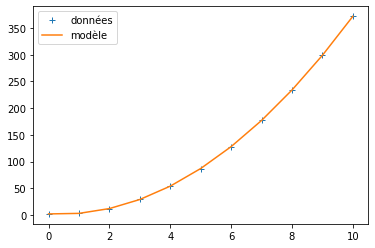

4.000000000000003 -3.0000000000000373 2.0000000000000737


In [7]:
X = np.array([0,1,2,3,4,5,6,7,8,9,10])
Y = 2 - 3 * np.array([0,1,2,3,4,5,6,7,8,9,10]) + 4 * np.array([0,1,2,3,4,5,6,7,8,9,10])**2
fit = np.polyfit(X,Y,2)
fit_func = np.poly1d(fit)
plt.figure()
plt.plot(X, Y, '+', label = "données")
plt.plot(X, fit_func(X), label = "modèle")
plt.legend()
plt.show()
print(fit[0],fit[1],fit[2])

<div class="alert alert-block alert-success">
    <b>Code et questions :</b> <br>
    1 - Simulez l'expérience de la chute d'une balle de tennis sans vitesse initiale sur une hauteur de 2 mètres environ puis tracer l'altitude en fonction du temps. <br>
    2 - Utilisez la fonction <a href=https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html> polyfit </a> de la bibliothèque numpy pour modéliser la chute comme en TP, c'est-à-dire avec un modèle sans frottements du type z = a*t**2 + b*t + c. Utilisez la fonction poly1d de numpy pour superposer le modèle à la simulation. Conclure.  
</div>

Ce dernier résultat est frappant et mérite d'être relevé : la constante g estimée est en dessous de la réalité (incertitudes prises en compte) alors que le modèle de chute libre sans frottements semble adapté à la simulation. 

Vous retiendrez qu'un modèle adapté ne veut pas dire qu'il correspond à la réalité. Un modèle peut être seulement invalidé par une expérience : la réalité nous échappera toujours. 

Une citation sur ce thème :
« Les concepts physiques sont des créations libres de l’esprit humain et ne sont pas, comme on pourrait le croire, uniquement déterminés par le monde extérieur. Dans l’effort que nous faisons pour comprendre le monde, nous ressemblons quelque peu à l’homme qui essaie de comprendre le mécanisme d’une montre fermée. Il voit le cadran et les aiguilles en mouvement, il entend le tic-tac, mais il n’a aucun moyen d’ouvrir le boîtier. S’il est ingénieux il pourra se former quelque image du mécanisme, qu’il rendra responsable de tout ce qu’il observe, mais il ne sera jamais sûr que son image soit la seule capable d’expliquer ses observations. Il ne sera jamais en état de comparer son image avec le mécanisme réel, et il ne peut même pas se représenter la possibilité ou la signification d’une telle comparaison. Mais le chercheur croit certainement qu’à mesure que ses connaissances s’accroîtront, son image de la réalité deviendra de plus en plus simple et expliquera des domaines de plus en plus étendus de ses impressions sensibles. Il pourra aussi croire à l’existence d’une limite idéale de la connaissance que l’esprit humain peut atteindre. Il pourra appeler cette limite idéale la vérité objective. » (Albert Einstein)